In [1]:
import pandas as pd
from functools import reduce
catboost = pd.read_csv('output/output.csv')
lgbm = pd.read_csv('output/output (1).csv')
lastquery = pd.read_csv('output/output (2).csv')
gcn = pd.read_csv('output/output (3).csv')
sakt = pd.read_csv('output/output (4).csv')

In [2]:
catboost = catboost.rename(columns={'prediction':'catboost(0.7608)'})
lgbm = lgbm.rename(columns={'prediction':'lgbm(0.7554)'})
lastquery = lastquery.rename(columns={'prediction':'lastquery(0.7043)'})
gcn = gcn.rename(columns={'prediction':'gcn(0.7097)'})
sakt = sakt.rename(columns={'prediction':'sakt(0.6962)'})

In [3]:
dfs=[catboost,lgbm,lastquery,gcn,sakt]
ensemble = reduce(lambda left, right: pd.merge(left,right,on='id'),dfs)
ensemble
#ensemble['catboost_predict'] = 

,id,catboost(0.7608),lgbm(0.7554),lastquery(0.7043),gcn(0.7097),sakt(0.6962)
0,0,0.651356,0.706401,0.340022,0.008353,2.698647e-01
1,1,0.732939,0.754777,0.793769,0.356834,9.998119e-01
2,2,0.202070,0.251666,0.244397,0.997945,1.027272e-06
3,3,0.831456,0.854030,0.757753,0.999376,9.996206e-01
4,4,0.303057,0.264930,0.219229,0.164189,2.556262e-07
...,...,...,...,...,...,...
739,739,0.018922,0.007802,0.103959,0.103476,4.696545e-08
740,740,0.592692,0.773507,0.566000,0.620392,9.934790e-01
741,741,0.775593,0.907276,0.632305,0.999691,9.999996e-01
742,742,0.815539,0.909073,0.538982,0.999592,1.000000e+00


In [4]:
import numpy as np
ensemble['catboost_answer']=ensemble['catboost(0.7608)'].apply(np.round)
ensemble['lgbm_answer']=ensemble['lgbm(0.7554)'].apply(np.round)
ensemble['lastquery_answer']=ensemble['lastquery(0.7043)'].apply(np.round)
ensemble['gcn_answer']=ensemble['gcn(0.7097)'].apply(np.round)
ensemble['sakt_answer']=ensemble['sakt(0.6962)'].apply(np.round)

ensemble

,id,catboost(0.7608),lgbm(0.7554),lastquery(0.7043),gcn(0.7097),sakt(0.6962),catboost_answer,lgbm_answer,lastquery_answer,gcn_answer,sakt_answer
0,0,0.651356,0.706401,0.340022,0.008353,2.698647e-01,1.0,1.0,0.0,0.0,0.0
1,1,0.732939,0.754777,0.793769,0.356834,9.998119e-01,1.0,1.0,1.0,0.0,1.0
2,2,0.202070,0.251666,0.244397,0.997945,1.027272e-06,0.0,0.0,0.0,1.0,0.0
3,3,0.831456,0.854030,0.757753,0.999376,9.996206e-01,1.0,1.0,1.0,1.0,1.0
4,4,0.303057,0.264930,0.219229,0.164189,2.556262e-07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
739,739,0.018922,0.007802,0.103959,0.103476,4.696545e-08,0.0,0.0,0.0,0.0,0.0
740,740,0.592692,0.773507,0.566000,0.620392,9.934790e-01,1.0,1.0,1.0,1.0,1.0
741,741,0.775593,0.907276,0.632305,0.999691,9.999996e-01,1.0,1.0,1.0,1.0,1.0
742,742,0.815539,0.909073,0.538982,0.999592,1.000000e+00,1.0,1.0,1.0,1.0,1.0


In [5]:
cor = ensemble[['catboost_answer','lgbm_answer','lastquery_answer','gcn_answer','sakt_answer']]
cor.corr(method='pearson')

,catboost_answer,lgbm_answer,lastquery_answer,gcn_answer,sakt_answer
catboost_answer,1.000000,0.857933,0.674717,0.522196,0.691840
lgbm_answer,0.857933,1.000000,0.705480,0.540205,0.667842
lastquery_answer,0.674717,0.705480,1.000000,0.509747,0.596443
gcn_answer,0.522196,0.540205,0.509747,1.000000,0.442728
sakt_answer,0.691840,0.667842,0.596443,0.442728,1.000000


<AxesSubplot:xlabel='prediction', ylabel='Count'>

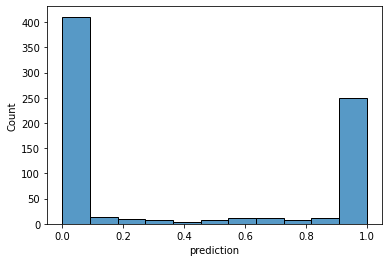

In [25]:
import seaborn as sns
sns.histplot(sakt['prediction'])

<AxesSubplot:xlabel='catboost', ylabel='Count'>

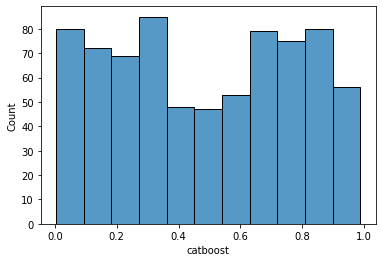

In [26]:
sns.histplot(ensemble['catboost'])

<AxesSubplot:xlabel='lgbm', ylabel='Count'>

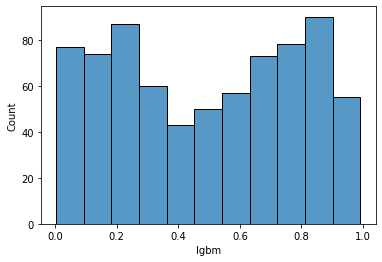

In [27]:
sns.histplot(ensemble['lgbm'])

<AxesSubplot:xlabel='gcn', ylabel='Count'>

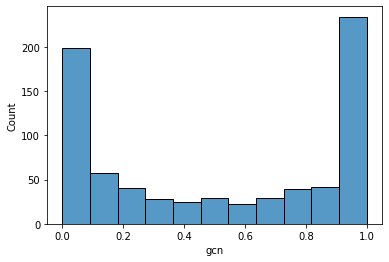

In [28]:
sns.histplot(ensemble['gcn'])

<AxesSubplot:xlabel='lastquery', ylabel='Count'>

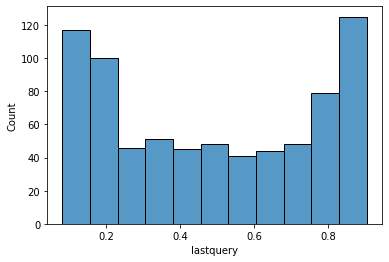

In [29]:
sns.histplot(ensemble['lastquery'])

In [6]:
ensemble['sum_answer'] = ensemble['catboost_answer'] + ensemble['lgbm_answer'] + ensemble['lastquery_answer'] + ensemble['gcn_answer'] + ensemble['sakt_answer']

In [7]:
ensemble['total']=[1 if x>=3 else 0 for x in ensemble['sum_answer']]
ensemble

,id,catboost(0.7608),lgbm(0.7554),lastquery(0.7043),gcn(0.7097),sakt(0.6962),catboost_answer,lgbm_answer,lastquery_answer,gcn_answer,sakt_answer,sum_answer,total
0,0,0.651356,0.706401,0.340022,0.008353,2.698647e-01,1.0,1.0,0.0,0.0,0.0,2.0,0
1,1,0.732939,0.754777,0.793769,0.356834,9.998119e-01,1.0,1.0,1.0,0.0,1.0,4.0,1
2,2,0.202070,0.251666,0.244397,0.997945,1.027272e-06,0.0,0.0,0.0,1.0,0.0,1.0,0
3,3,0.831456,0.854030,0.757753,0.999376,9.996206e-01,1.0,1.0,1.0,1.0,1.0,5.0,1
4,4,0.303057,0.264930,0.219229,0.164189,2.556262e-07,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,0.018922,0.007802,0.103959,0.103476,4.696545e-08,0.0,0.0,0.0,0.0,0.0,0.0,0
740,740,0.592692,0.773507,0.566000,0.620392,9.934790e-01,1.0,1.0,1.0,1.0,1.0,5.0,1
741,741,0.775593,0.907276,0.632305,0.999691,9.999996e-01,1.0,1.0,1.0,1.0,1.0,5.0,1
742,742,0.815539,0.909073,0.538982,0.999592,1.000000e+00,1.0,1.0,1.0,1.0,1.0,5.0,1


In [17]:
x=ensemble[['catboost_answer','lgbm_answer','lastquery_answer','gcn_answer','sakt_answer']]
a = np.array(ensemble['total'])
key = []
for i in range(len(x)):
    x.iloc[i,:]
    key.append(np.where(x.iloc[i,:]==a[i])[0])
    #key.append(np.where(x.iloc[i,:]==a[i])[0][0])


In [18]:
key = np.array(key) +1

/tmp/ipykernel_55840/408562253.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  key = np.array(key) +1


In [29]:
predict = []
for i in range(len(key)):
    #predict.append(ensemble.iloc[i,key[i]])
    #predict.append(ensemble.iloc[i,sum(key[i])/len(key[i])])
    predict.append(pd.DataFrame(ensemble.iloc[i,key[i]]).mean())

In [30]:
len(predict)

744

In [31]:
output = pd.DataFrame({'id':list(range(744)),'prediction':predict})

In [35]:
output.to_csv('hard_ensemble_2.csv',index=False)